Here, we numerically analyze the function we got for the dependency of $\chi$, in the the constant-spacing that defines the activation function


In [19]:
import sys
sys.path.insert(0, "../src")
sys.path.insert(0, "..")
import src
import torch
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

We define this function to scan for the optimal spacing $\tilde{D}_{opt}$, and the optimal $\chi_{max}$ acheiveable for every quantization level.

We implement in it the function:
$$ \chi=\frac{\sum_{i\in K}\sum_{j\in K}\frac{1}{2\pi}\exp\left[-\frac{1}{2}\left(i^{2}+j^{2}\right)\tilde{D}^{2}\right]}{\sum_{i\in K}\sum_{j\in K}\Psi\left(-\max\left(i,j\right)\tilde{D}\right)\Psi\left(\min\left(i,j\right)\tilde{D}\right)} $$

when $K=\left\{ k-\frac{N}{2}|\forall k\in\mathcal{\mathbb{N}},k<N\right\}$

Decrease the parameter N for faster execution with reduced accuracy.

In [14]:
def boundaries_scan(all_states,N= 1000):
    bests={}
    optXs={}
    for states in all_states:
        D = states-1
        K = int(D/2)
        chi = np.zeros(N)
        factor = 1.0/(2*np.pi)
        spaces= torch.linspace(0.0,2.0,N)

        for i in range(N):
            space = spaces[i]
            if (states %2 ==0):
                offsets = space * torch.linspace(-K,K,D)
            else:
                offsets = space * torch.linspace(-K+0.5,K-0.5,D)
            cdfs= src.generalQ.normal_cdf(offsets).repeat(D,1)
            maxcdf = torch.max(cdfs,cdfs.t())
            mincdf = torch.min(cdfs,cdfs.t())

            Q = torch.sum((1-maxcdf)*mincdf)
            mu0, mu1 = src.generalQ.meshgrid(offsets)
            term = torch.sum(torch.exp((-0.5)*(mu0**2+mu1**2)))
            chi[i] = factor*term/Q

        maxchi=max(chi)
        optX = spaces[np.argmax(chi)]
        plt.plot(spaces.numpy(),chi,label = "%d states, $\chi_{max}$=%.04f" % (states,maxchi))
        ##optX = optX/(2*(D-1))
        optXs[states] = optX
        bests[states] = maxchi
        print("States: %d, 1-chi: %.06f, optX: %.06f" % (states ,1.0-maxchi, optX))

    plt.legend()
    plt.title("Fixed point boundary- linear spacing")
    plt.xlabel("Activation limits")
    plt.ylabel("$\chi$")
    plt.gcf().set_size_inches(12, 12)
    plt.grid(b=None, which='both', axis='both',color='k', linestyle='-', linewidth=1.5)
    plt.show()
    return optXs, bests

We run it over even numbers of quantization levels first:

States: 4, 1-chi: 0.118846, optX: 0.995498
States: 6, 1-chi: 0.060657, optX: 0.734367
States: 8, 1-chi: 0.037440, optX: 0.586293
States: 10, 1-chi: 0.025687, optX: 0.490245
States: 12, 1-chi: 0.018853, optX: 0.423212
States: 14, 1-chi: 0.014501, optX: 0.374187
States: 16, 1-chi: 0.011543, optX: 0.335168
States: 18, 1-chi: 0.009434, optX: 0.304152
States: 20, 1-chi: 0.007873, optX: 0.279140
States: 22, 1-chi: 0.006682, optX: 0.258129
States: 24, 1-chi: 0.005751, optX: 0.239120
States: 26, 1-chi: 0.005008, optX: 0.224112
States: 28, 1-chi: 0.004406, optX: 0.210105
States: 30, 1-chi: 0.003909, optX: 0.199100
States: 32, 1-chi: 0.003495, optX: 0.188094
States: 34, 1-chi: 0.003146, optX: 0.179090
States: 36, 1-chi: 0.002848, optX: 0.170085
States: 38, 1-chi: 0.002593, optX: 0.163082
States: 40, 1-chi: 0.002371, optX: 0.155078
States: 42, 1-chi: 0.002176, optX: 0.149075
States: 44, 1-chi: 0.002007, optX: 0.143072
States: 46, 1-chi: 0.001857, optX: 0.138069
States: 48, 1-chi: 0.001724, optX: 

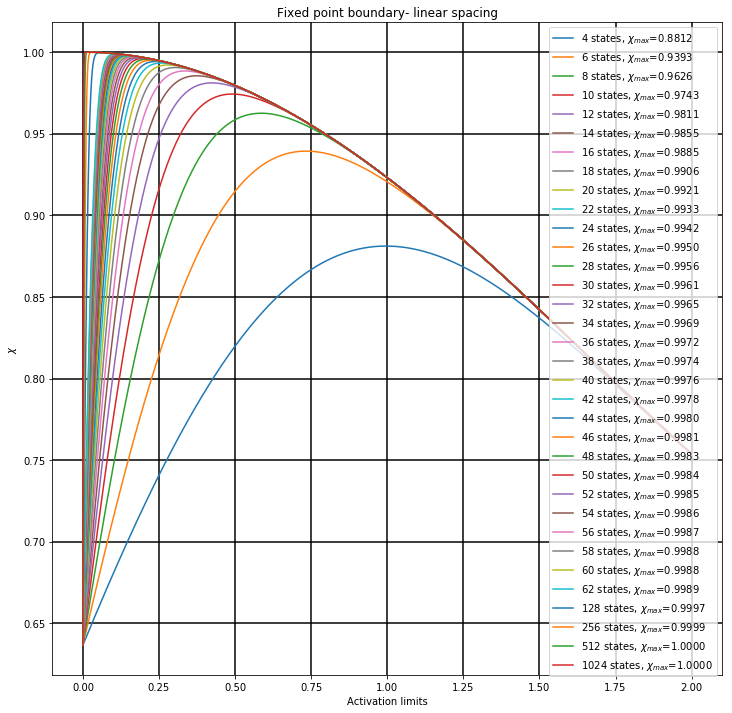

In [15]:
evens = [i for j in (range(4,64,2), [128,256,512,1024]) for i in j]
even_optx, even_best = boundaries_scan(evens,2000)

Next, we run it over odd numbers of quantization levels:

States: 3, 1-chi: 0.190174, optX: 1.223612
States: 5, 1-chi: 0.082178, optX: 0.842421
States: 7, 1-chi: 0.046860, optX: 0.650325
States: 9, 1-chi: 0.030696, optX: 0.534267
States: 11, 1-chi: 0.021856, optX: 0.454227
States: 13, 1-chi: 0.016452, optX: 0.397199
States: 15, 1-chi: 0.012890, optX: 0.353177
States: 17, 1-chi: 0.010405, optX: 0.319160
States: 19, 1-chi: 0.008598, optX: 0.291146
States: 21, 1-chi: 0.007239, optX: 0.268134
States: 23, 1-chi: 0.006189, optX: 0.248124
States: 25, 1-chi: 0.005360, optX: 0.231116
States: 27, 1-chi: 0.004692, optX: 0.217109
States: 29, 1-chi: 0.004146, optX: 0.204102
States: 31, 1-chi: 0.003693, optX: 0.193097
States: 33, 1-chi: 0.003313, optX: 0.183092
States: 35, 1-chi: 0.002991, optX: 0.174087
States: 37, 1-chi: 0.002716, optX: 0.166083
States: 39, 1-chi: 0.002477, optX: 0.159080
States: 41, 1-chi: 0.002271, optX: 0.152076
States: 43, 1-chi: 0.002089, optX: 0.146073
States: 45, 1-chi: 0.001930, optX: 0.141071
States: 47, 1-chi: 0.001788, optX: 0

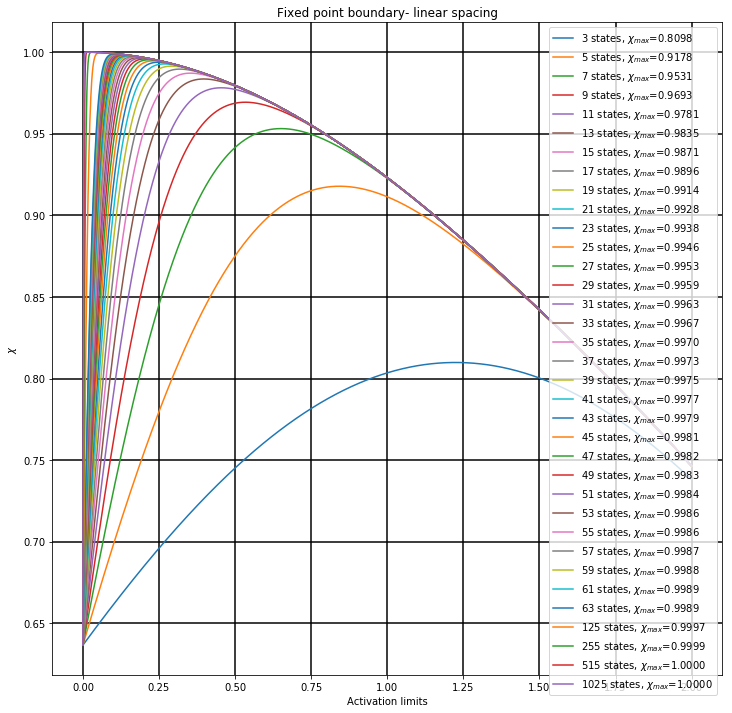

In [16]:
odds = [i for j in (range(3,65,2), [125,255,515,1025]) for i in j]
odd_opt, odd_best = boundaries_scan(odds,2000)

We merge the even/odd results, as we don't need them to be seperate for the final analysis

In [17]:
optx = {}
optx.update(even_optx)
optx.update(odd_opt)

best = {}
best.update(even_best)
best.update(odd_best)

Finally, we run linear regression and plot them on a graph, generating figure #2 from the article

slope: -1.8172, intercept: 0.7100, std_err: 0.0030
slope: -0.8790, intercept: 1.4025, std_err: 0.00066


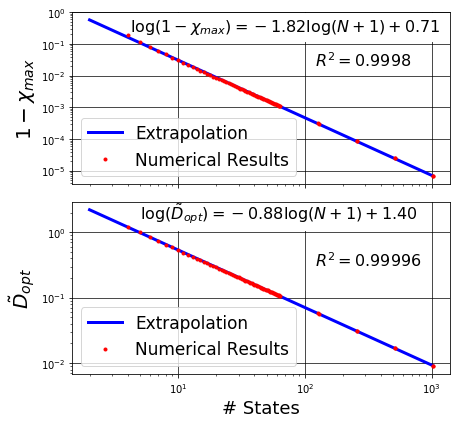

In [20]:


fig = plt.figure()
ax = fig.add_subplot(211)
plt.gcf().set_size_inches(6.5, 6)

bests= best
vals = [1-val for val in bests.values()]
states = [(s+1) for s in bests.keys()]
slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(states),np.log(vals))
print("slope: %.04f, intercept: %.04f, std_err: %.04f" % (slope,intercept,std_err))
x = np.linspace(2,1024,1023)
y= (x**slope)*np.exp(intercept)
ax.loglog(x,y,'b',lineWidth=3.0, label="Extrapolation")
ax.loglog(states,vals,lineWidth=0.0,color='r',marker='.', label="Numerical Results")


ax.legend(loc='lower left',fontsize=17).set_zorder(3)
equation="$\log(1-\chi_{max})=%.02f\log(N+1)+%.02f$" % (slope,intercept)

bbox= dict(boxstyle="square",
                   ec=(1., 1., 1.),
                   fc=(1., 1., 1.),
                   )

ax.text(4.2, 0.25, r'%s' % equation , fontsize=16,color='k' , bbox=bbox,fontweight = 'bold').set_zorder(1.9)
ax.text(120, 0.02, r'$R^2= %.04f$' % r_value**2 , fontsize=16,color='k', bbox=bbox,fontweight = 'bold').set_zorder(1.9)
plt.ylabel("$1-\chi_{max}$",fontSize=20)
plt.grid(b=None, which='major', axis='both',color='k', linestyle='-', linewidth=0.7)
frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])

ax = fig.add_subplot(212)



bests = optx
vals = [float(val) for val in bests.values()]
states = [int(s+1) for s in bests.keys()]
slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(states),np.log(vals))
print("slope: %.04f, intercept: %.04f, std_err: %.05f" % (slope,intercept,std_err))
x = np.linspace(2,1024,1023)
y= (x**slope)*np.exp(intercept)

ax.loglog(x,y,'b',lineWidth=3.0, label="Extrapolation")
ax.loglog(states,vals,lineWidth=0.0,color='r',marker='.', label="Numerical Results")

ax.legend(loc='lower left',fontsize=17).set_zorder(3)
equation="$\log(\\tilde{D}_{opt})=%.02f\log(N+1)+%.02f$" % (slope,intercept)

ax.text(5, 1.6, r'%s' % equation , fontsize=16,color='k', bbox=bbox).set_zorder(1.9)
ax.text(120, 0.3, r'$R^2= %.05f$' % r_value**2 , fontsize=16,color='k', bbox=bbox).set_zorder(1.9)
plt.xlabel("# States",fontsize=18)
plt.ylabel("$\\tilde{D}_{opt}$",fontsize=20)
plt.grid(b=None, which='major', axis='both',color='k', linestyle='-', linewidth=0.7)


fig.tight_layout()
fig.savefig("extrapolation2.pdf", bbox_inches='tight')
plt.savefig("extrapolation2.eps", format='eps', dpi=1000, bbox_inches='tight')

plt.show()

We use the formula from this linear-regression to implement the function "optimal_spacing" 